## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
card_data = pd.read_csv("cards.csv")
card_data = card_data.reindex(columns=['hp', 'damage','converted_energy_cost','converted_retreat_cost','resistance','weakness', 'age', 'pokedex_nr','average_price','type'])


In [3]:
card_data.head()

,hp,damage,converted_energy_cost,converted_retreat_cost,resistance,weakness,age,pokedex_nr,average_price,type
0,130,70,3.000000,3,150,160,6048,181,1.87,8
1,50,20,1.000000,1,50,100,1682,10,1.85,7
2,80,20,2.000000,1,80,160,7143,184,6.04,11
3,270,127,3.666667,4,270,540,1938,3,12.19,7
4,130,10,1.000000,2,130,160,5580,9,10.00,11


In [4]:
card_data.describe()

,hp,damage,converted_energy_cost,converted_retreat_cost,resistance,weakness,age,pokedex_nr,average_price,type
count,13488.000000,13488.000000,13488.000000,13488.000000,13488.000000,13488.000000,13488.000000,13488.000000,13488.00000,13488.000000
mean,105.776246,41.889531,1.785278,1.698621,112.555605,204.730872,3536.428529,377.461299,6.95907,6.643609
std,61.600988,40.436474,0.954118,0.865453,62.401822,124.607257,2618.205855,273.543585,55.34481,3.319986
min,30.000000,0.000000,0.000000,1.000000,30.000000,30.000000,62.000000,1.000000,0.02000,1.000000
25%,60.000000,15.000000,1.000000,1.000000,70.000000,120.000000,1287.000000,138.000000,0.10000,5.000000
50%,90.000000,30.000000,2.000000,1.000000,90.000000,160.000000,2850.000000,326.000000,0.52000,7.000000
75%,130.000000,60.000000,2.500000,2.000000,140.000000,260.000000,5682.000000,590.000000,3.03000,10.000000
max,340.000000,300.000000,5.000000,5.000000,370.000000,680.000000,9266.000000,1010.000000,5190.00000,11.000000


In [5]:
data_corr = card_data[['hp', 'damage','converted_energy_cost','converted_retreat_cost','resistance','weakness', 'age', 'pokedex_nr','average_price','type']].corr()
data_corr

,hp,damage,converted_energy_cost,converted_retreat_cost,resistance,weakness,age,pokedex_nr,average_price,type
hp,1.000000,0.721462,0.410513,0.493304,0.983899,0.977955,-0.413144,0.241229,0.055992,-0.025967
damage,0.721462,1.000000,0.681009,0.467881,0.707179,0.709183,-0.351526,0.208812,0.037330,-0.046701
converted_energy_cost,0.410513,0.681009,1.000000,0.498855,0.405276,0.405487,-0.043902,0.056648,0.052062,-0.033527
converted_retreat_cost,0.493304,0.467881,0.498855,1.000000,0.481218,0.483416,-0.149445,0.105529,0.031884,-0.010238
resistance,0.983899,0.707179,0.405276,0.481218,1.000000,0.962319,-0.398353,0.242427,0.060038,-0.032656
weakness,0.977955,0.709183,0.405487,0.483416,0.962319,1.000000,-0.430665,0.242376,0.054672,-0.013044
age,-0.413144,-0.351526,-0.043902,-0.149445,-0.398353,-0.430665,1.000000,-0.448584,0.071952,0.031118
pokedex_nr,0.241229,0.208812,0.056648,0.105529,0.242427,0.242376,-0.448584,1.000000,-0.054650,-0.010057
average_price,0.055992,0.037330,0.052062,0.031884,0.060038,0.054672,0.071952,-0.054650,1.000000,-0.022207
type,-0.025967,-0.046701,-0.033527,-0.010238,-0.032656,-0.013044,0.031118,-0.010057,-0.022207,1.000000


In [6]:
for column in card_data[['hp', 'damage','converted_energy_cost','converted_retreat_cost','resistance','weakness', 'age', 'pokedex_nr','average_price','type']]:
    stats = card_data[column]
    stat, p = shapiro(stats)
    print(column,'Statistics=%.3f, p=%.15f' % (stat, p))
    # reject H0 (data is normally distributed) if p < 0.05

hp Statistics=0.836, p=0.000000000000000
damage Statistics=0.823, p=0.000000000000000
converted_energy_cost Statistics=0.962, p=0.000000000000000
converted_retreat_cost Statistics=0.761, p=0.000000000000000
resistance Statistics=0.856, p=0.000000000000000
weakness Statistics=0.849, p=0.000000000000000
age Statistics=0.923, p=0.000000000000000
pokedex_nr Statistics=0.936, p=0.000000000000000
average_price Statistics=0.072, p=0.000000000000000
type Statistics=0.911, p=0.000000000000000


c:\Users\Raman\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13488.
  res = hypotest_fun_out(*samples, **kwds)


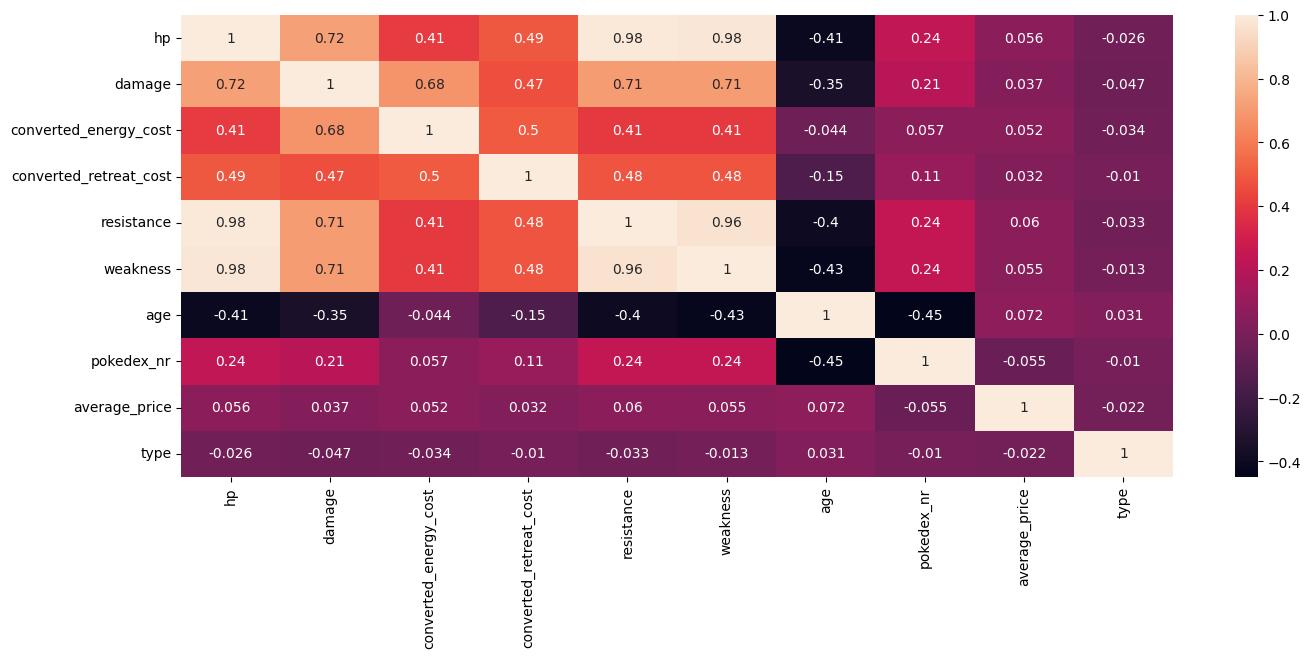

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_corr, annot=True)

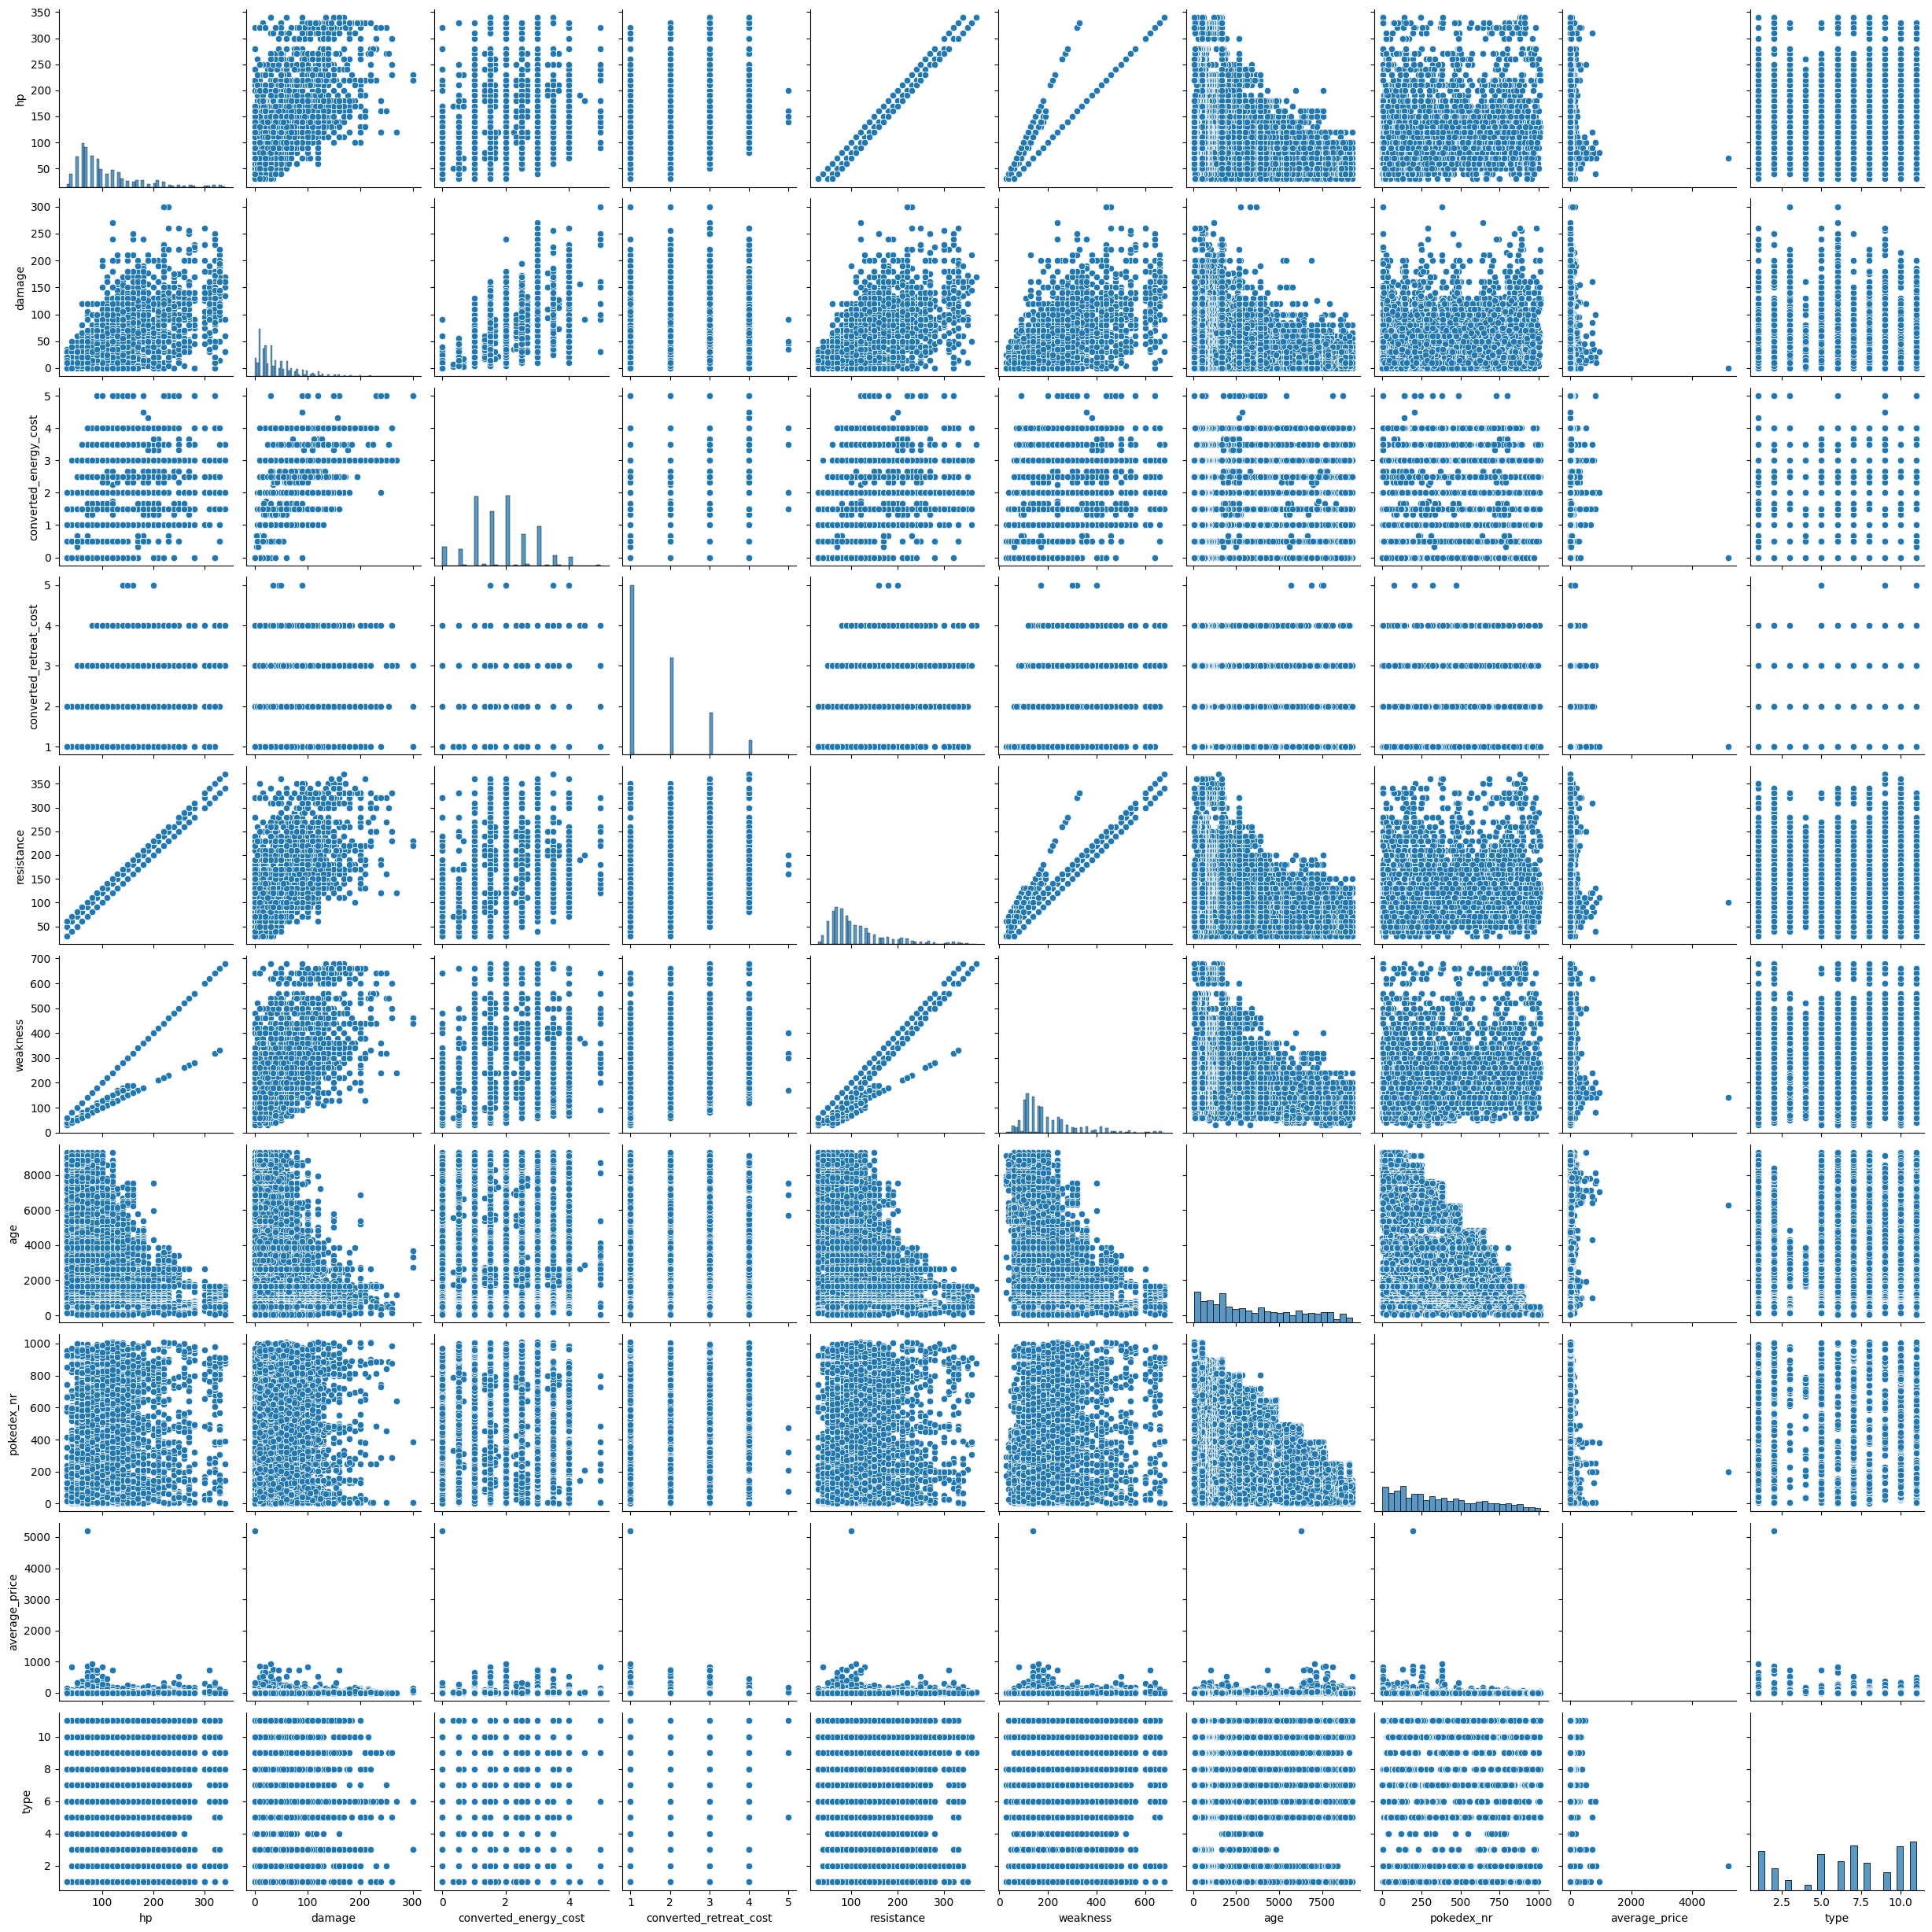

In [8]:
sns.pairplot(card_data)
plt.show()

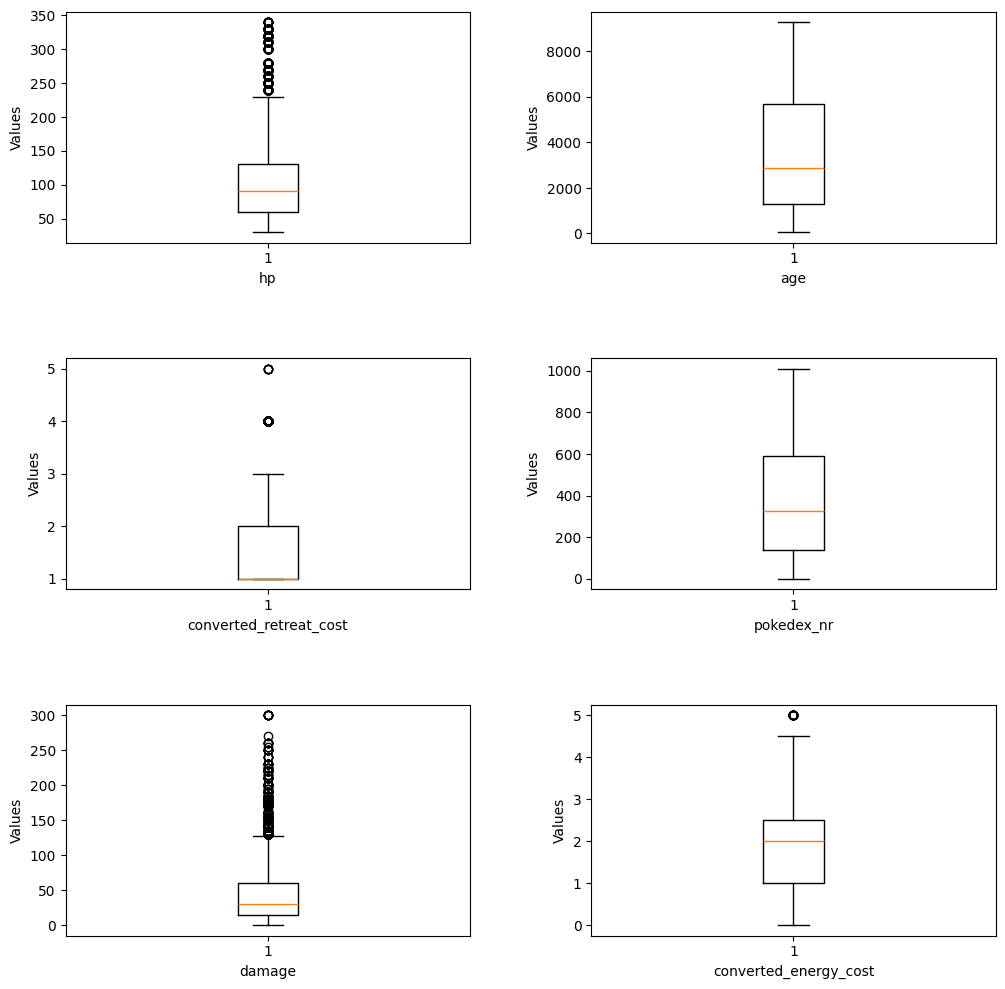

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

columns = ['hp', 'age', 'converted_retreat_cost', 'pokedex_nr', 'damage', 'converted_energy_cost']

for ax, column in zip(axes.flatten(), columns):
    ax.boxplot(card_data[column])
    ax.set_xlabel(column)
    ax.set_ylabel('Values')

plt.show()

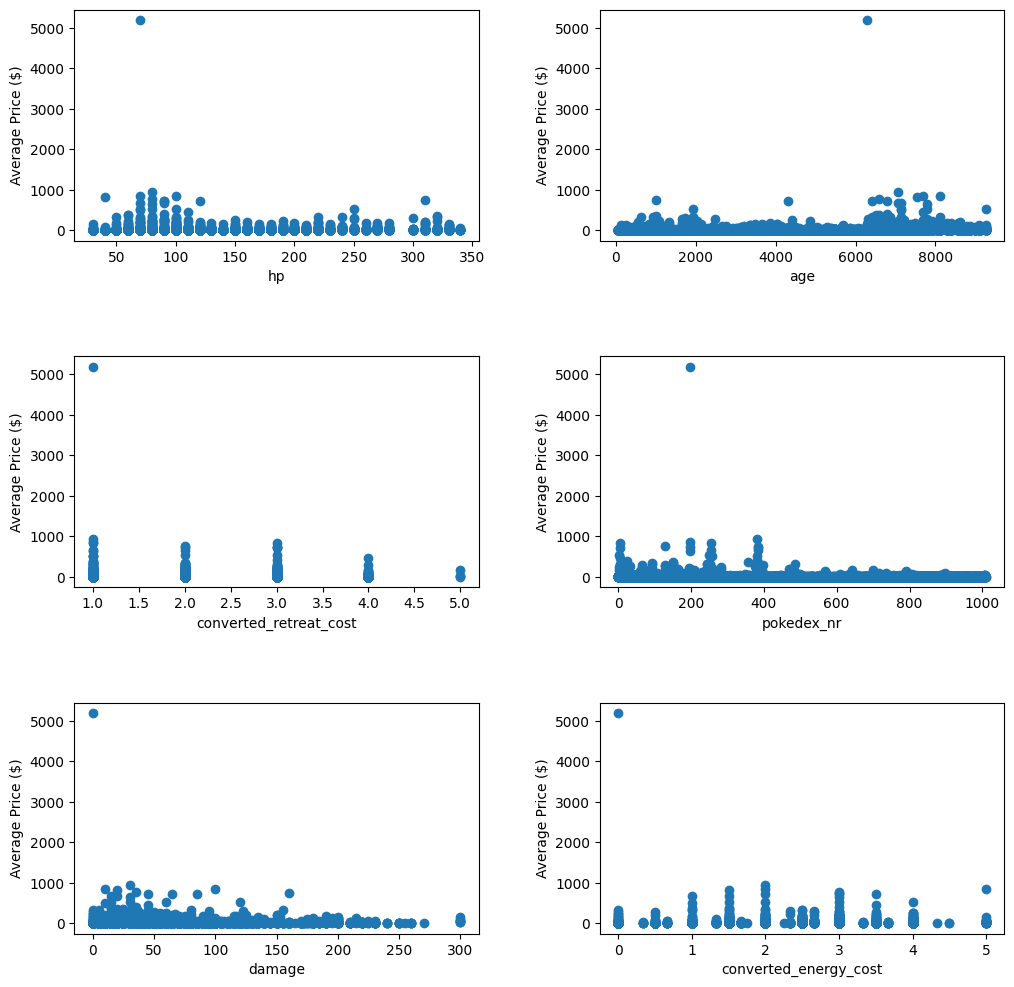

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

columns = ['hp', 'age', 'converted_retreat_cost', 'pokedex_nr', 'damage', 'converted_energy_cost']

for ax, column in zip(axes.flatten(), columns):
    ax.scatter(card_data[column], card_data['average_price'])
    ax.set_xlabel(column)
    ax.set_ylabel('Average Price ($)')

plt.show()

In [11]:
# Define price ranges
bins = [0, 10, 20, float('inf')]
labels = ['low', 'medium', 'high']

# Create a new column 'price_range' based on 'average_price'
card_data['price_range'] = pd.cut(card_data['average_price'], bins=bins, labels=labels)

# Group by 'price_range'
grouped_card_data = card_data.groupby('price_range')

# Now you can perform operations on the grouped data. For example, to get the size of each group:
group_sizes = grouped_card_data.size()
print(group_sizes)

price_range
low       11936
medium      731
high        821
dtype: int64


C:\Users\Raman\AppData\Local\Temp\ipykernel_7680\555323266.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_card_data = card_data.groupby('price_range')


In [12]:
#we split our data into training and test data
X = card_data[['hp', 'damage','converted_energy_cost','converted_retreat_cost','resistance','weakness', 'age', 'pokedex_nr','type']]
y = card_data['average_price']

# change your train and test size to check accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
#we create our randomforest classifier
#clf = RandomForestRegressor(random_state = 5)
mdl = LinearRegression()

In [14]:
#we train our data
mdl.fit(X_train, y_train)

LinearRegression()

In [15]:


# Predict on the test set
y_pred = mdl.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 7783.43290563809
R^2 Score: 0.006168614606156586
